# Import libraries and data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import os
import sys
module_path = os.path.abspath(".")
sys.path.insert(0, module_path)
from helpers import load_data

plant1, plant2, weather1, weather2 = load_data()

# Linear regression

In [15]:
df = pd.merge(plant2[["DC_POWER", "DATE_TIME", "AC_POWER", "SOURCE_KEY"]], 
              weather2[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "DATE_TIME", "IRRADIATION"]], 
              on="DATE_TIME")
df.groupby("SOURCE_KEY").sum()

/var/folders/yg/2cqtqmlx0kv8m64vw66wpkt00000gn/T/ipykernel_20083/3734861337.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("SOURCE_KEY").sum()


,DC_POWER,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
SOURCE_KEY,,,,,
4UPUqMRk7TRMgml,887444.875348,867688.151550,89789.058598,104745.557462,738.219540
81aHJ1q11NBPMrL,752165.196310,735648.671081,91478.174216,106805.277441,758.489817
9kRcWv60rDACzjR,797324.213511,779819.329933,91478.174216,106805.277441,758.489817
Et9kgGMDl729KT4,601396.050982,588615.708104,89789.058598,104745.557462,738.219540
IQ2d7wF4YD8zU1Q,672411.639080,657492.579189,64543.744117,74326.940166,496.368299
LYwnQax7tkwH5Cb,639696.326687,626022.753183,91478.174216,106805.277441,758.489817
LlT2YUhhzqhg5Sw,800062.652611,782521.577770,91478.174216,106805.277441,758.489817
Mx2yZCDsyf6DPfv,910617.270808,890317.270321,89789.058598,104745.557462,738.219540
NgDl19wMapZy17u,644144.508733,629927.405301,64543.744117,74326.940166,496.368299


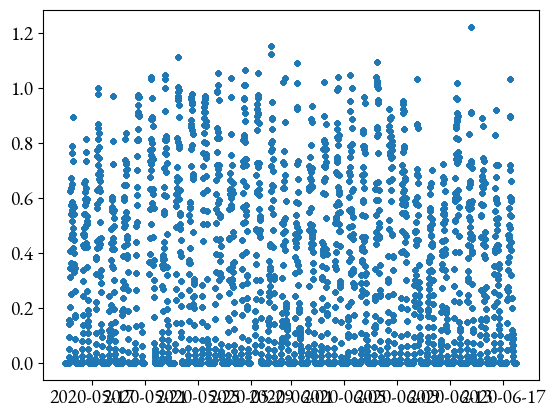

In [8]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# The data split for the regressions
X_train = df1[["IRRADIATION"]]
y_train = df1[["AC_POWER"]]


X_test = df2[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]]
y_test = df2[["AC_POWER"]]

plt.plot(df1["DATE_TIME"], df1["IRRADIATION"], ".")

## Ordinary Least Squares

In [59]:
model = LinearRegression()
ts = TimeSeriesSplit()
#grid = GridSearchCV(estimator = model, cv = ts)
#grid.fit(X_train, y_train)
X_train.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,25.184316,22.857507,0.0
1,25.184316,22.857507,0.0
2,25.184316,22.857507,0.0
3,25.184316,22.857507,0.0
4,25.184316,22.857507,0.0


In [10]:

tscv = TimeSeriesSplit(n_splits=10)
model = LinearRegression()

for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
    print(train_index, test_index)
    #plt.plot(X_train.iloc[train_index], y_train.iloc[train_index])
    #model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    #print(model.score(X_train.iloc[test_index], y_train.iloc[test_index]))
    

[   0    1    2 ... 6251 6252 6253] [ 6254  6255  6256 ... 12503 12504 12505]
[    0     1     2 ... 12503 12504 12505] [12506 12507 12508 ... 18755 18756 18757]
[    0     1     2 ... 18755 18756 18757] [18758 18759 18760 ... 25007 25008 25009]
[    0     1     2 ... 25007 25008 25009] [25010 25011 25012 ... 31259 31260 31261]
[    0     1     2 ... 31259 31260 31261] [31262 31263 31264 ... 37511 37512 37513]
[    0     1     2 ... 37511 37512 37513] [37514 37515 37516 ... 43763 43764 43765]
[    0     1     2 ... 43763 43764 43765] [43766 43767 43768 ... 50015 50016 50017]
[    0     1     2 ... 50015 50016 50017] [50018 50019 50020 ... 56267 56268 56269]
[    0     1     2 ... 56267 56268 56269] [56270 56271 56272 ... 62519 62520 62521]
[    0     1     2 ... 62519 62520 62521] [62522 62523 62524 ... 68771 68772 68773]


In [182]:
from sklearn.model_selection import train_test_split
#inv = df[df["SOURCE_KEY"] == "1IF53ai7Xc0U56Y"]
#inv = inv.drop(["SOURCE_KEY"], axis=1)
y = df["DC_POWER"]
x = df[["IRRADIATION", "MODULE_TEMPERATURE", "AMBIENT_TEMPERATURE"]]#.to_numpy().reshape(-1, 1)#df.drop(["DC_POWER"], axis=1)
#x = df[["IRRADIATION"]].to_numpy().reshape(-1, 1)#df.drop(["DC_POWER"], axis=1)


X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)

In [183]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": np.logspace(-3, 3, 10)
};

grid = GridSearchCV(Ridge(), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("Rigde: ", grid.best_params_)

grid = GridSearchCV(Lasso(), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("Lasso: ", grid.best_params_)

param_grid["l1_ratio"] = np.linspace(0, 1, 10) 

grid = GridSearchCV(ElasticNet(), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("ElasticNet: ", grid.best_params_)




Rigde:  {'alpha': 0.021544346900318832}
Lasso:  {'alpha': 0.021544346900318832}


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.607e+09, tolerance: 6.739e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+10, tolerance: 6.770e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

ElasticNet:  {'alpha': 0.021544346900318832, 'l1_ratio': 1.0}


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.949e+11, tolerance: 6.739e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.948e+11, tolerance: 6.735e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

In [185]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rr_model = Ridge(alpha=0.05722367659350217)
rr_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.014174741629268055)
lasso_model.fit(X_train, y_train)

en_model = ElasticNet(alpha=0.014174741629268055, l1_ratio=1.0)
en_model.fit(X_train, y_train)

np.set_printoptions(suppress=True, precision=7)

lr_score = lr_model.score(X_test, y_test)
print(f"Score is {lr_score*100:.10f} %")

rr_score = rr_model.score(X_test, y_test)
print(f"Score is {rr_score*100:.10f} %")

lasso_score = lasso_model.score(X_test, y_test)
print(f"Score is {lasso_score*100:.10f} %")

en_score = en_model.score(X_test, y_test)
print(f"Score is {en_score*100:.10f} %")

Score is 98.0267992847 %
Score is 98.0267685031 %
Score is 98.0267694007 %
Score is 98.0267694007 %


In [162]:
xx = np.linspace(0, 1.2).reshape(-1, 1)
yyl = lr_model.predict(xx)
yyr = rr_model.predict(xx)
yyla = lasso_model.predict(xx)
yyen = en_model.predict(xx)

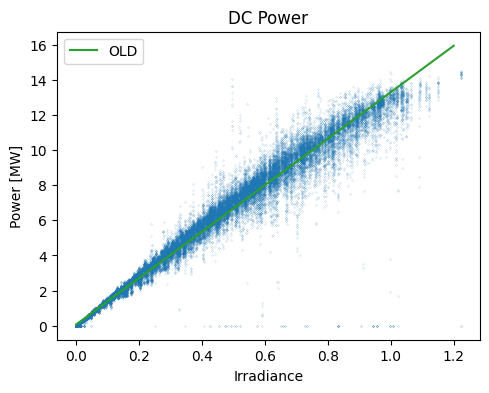

In [191]:
#inv = df[df["SOURCE_KEY"] == "1IF53ai7Xc0U56Y"]
plt.style.use("default")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("DC Power")
plt.scatter(df["IRRADIATION"], df["DC_POWER"] / 1000, s=0.01)
plt.plot(xx, yyl / 1000, color="tab:green", label="OLD")
#plt.plot(xx, yyr / 1000, color="tab:orange", label="Ridge")
#plt.plot(xx, yyla / 1000, color="tab:red", label="Lasso")
#plt.plot(xx, yyen / 1000, color="black", label="ElasticNet")
plt.ylabel("Power [MW]")
plt.xlabel("Irradiance")
#plt.yscale("log")
plt.legend()



#plt.subplot(1, 2, 2)
#plt.title("AC Power")
#plt.scatter(df["IRRADIATION"], df["AC_POWER"] / 1000)
#plt.ylabel("Power [MW]")
#plt.xlabel("Irradiance")


Text(0.5, 0, 'Temperature')

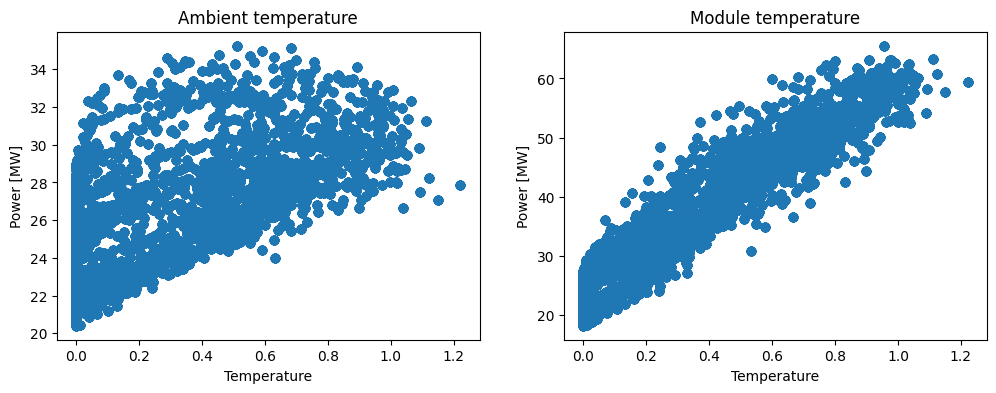

In [127]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Ambient temperature")
plt.scatter(df["IRRADIATION"], df["AMBIENT_TEMPERATURE"])
plt.ylabel("Power [MW]")
plt.xlabel("Temperature")

plt.subplot(1, 2, 2)
plt.title("Module temperature")
plt.scatter(df["IRRADIATION"], df["MODULE_TEMPERATURE"])
plt.ylabel("Power [MW]")
plt.xlabel("Temperature")





Text(0.5, 0, 'DC Power [MW]')

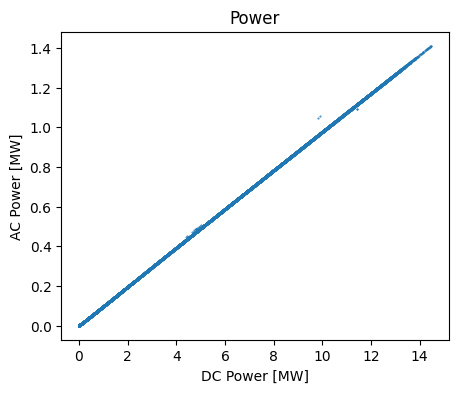

In [137]:
plt.figure(figsize=(5, 4))

plt.title("Power")
plt.scatter(df["DC_POWER"] / 1000, df["AC_POWER"] / 1000, s=0.2)
plt.ylabel("AC Power [MW]")
plt.xlabel("DC Power [MW]")




In [186]:
param_grid["l1_ratio"] 

array([0.       , 0.1111111, 0.2222222, 0.3333333, 0.4444444, 0.5555556,
       0.6666667, 0.7777778, 0.8888889, 1.       ])

(0.0, 5000.0)

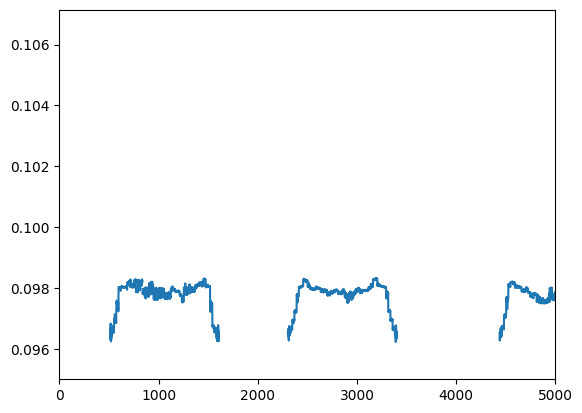

In [193]:

ac_power = df["AC_POWER"]
dc_power = df["DC_POWER"]

plt.plot(ac_power/dc_power)
plt.xlim(0, 5000)

In [194]:
df

,DC_POWER,DATE_TIME,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0.0,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0
1,0.0,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0
2,0.0,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0
3,0.0,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0
4,0.0,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...
68769,0.0,2020-06-17 23:45:00,0.0,21.909288,20.427972,0.0
68770,0.0,2020-06-17 23:45:00,0.0,21.909288,20.427972,0.0
68771,0.0,2020-06-17 23:45:00,0.0,21.909288,20.427972,0.0
68772,0.0,2020-06-17 23:45:00,0.0,21.909288,20.427972,0.0


In [195]:
plant1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


(0.0955, 0.0985)

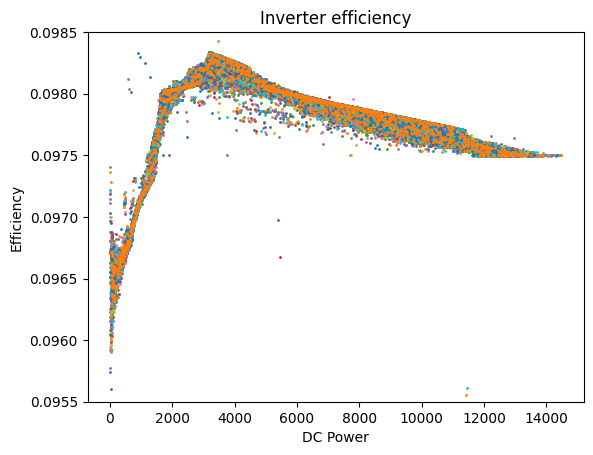

In [222]:
df = pd.merge(plant1[["DC_POWER", "DATE_TIME", "AC_POWER", "SOURCE_KEY"]], weather1[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "DATE_TIME", "IRRADIATION"]], on="DATE_TIME")

inv = df[df["SOURCE_KEY"] == "z9Y9gH1T5YWrNuG"]

plt.style.use("default")
plt.title("Inverter efficiency")

for a in df["SOURCE_KEY"].unique():
    inv = df[df["SOURCE_KEY"] == a]
    plt.scatter(inv["DC_POWER"], inv["AC_POWER"] / inv["DC_POWER"], s=1)

plt.xlabel("DC Power")
plt.ylabel("Efficiency")
plt.ylim(0.0955, 0.0985)
#plt.plot(["DC_POWER"])

(array([ 915., 1683.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.]),
 array([0.0975351, 0.0977163, 0.0978974, 0.0980786, 0.0982597, 0.0984408,
        0.098622 , 0.0988031, 0.0989843, 0.0991654, 0.0993466, 0.0995277,
        0.0997088, 0.09989  , 0.1000711, 0.1002523, 0.1004334, 0.1006145,
        0.1007957, 0.1009768, 0.101158 , 0.1013391, 0.1015202, 0.1017014,
        0.1018825, 0.1020637, 0.1022448, 0.1024259, 0.1026071, 0.1027882,
        0.1029694, 0.1031505, 0.1033317, 0.1035128, 0.1036939, 0.1038751,
        0.1040562, 0.1042374, 0.1044185, 0.1045996, 0.1047808, 0.1049619,
        0.1051431, 0.1053242, 0.1055053, 0.1056865, 0.1058676, 0.1060488,
        

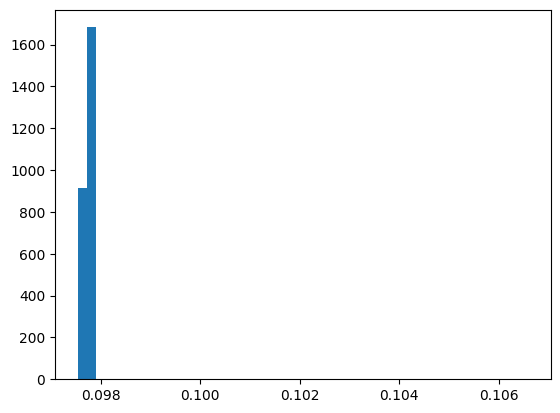

In [228]:
dfinv = df[df["DC_POWER"].between(9000, 10000)]
data = (dfinv["AC_POWER"] / dfinv["DC_POWER"]).to_numpy()
sigm = 
plt.hist(data, bins=50)

In [ ]:
plant1.sum()